In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
cancer = load_breast_cancer()
X_train, X_test, y_train , y_test = train_test_split(cancer.data , cancer.target, random_state = 0)

In [13]:
#without scaling
svc = SVC()
svc.fit(X_train, y_train)
print("accuracy on training set: %f" % svc.score(X_train, y_train))
print("accuracy on test set: %f" % svc.score(X_test, y_test))
#overfitting and very poor performance

accuracy on training set: 1.000000
accuracy on test set: 0.629371


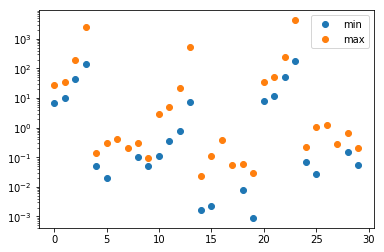

In [14]:
# data on very different different scale
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")
# hence scaling is required

In [15]:
#scaling of the data
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, divide by range
# afterwards min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n%s" % X_train_scaled.min(axis=0))
print("Maximum for each feature\n %s" % X_train_scaled.max(axis=0))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))
#Quite underfitting -- training and test in same regime

accuracy on training set: 0.948357
accuracy on test set: 0.951049


In [17]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("accuracy on training set: %f" % svc.score(X_train_scaled, y_train))
print("accuracy on test set: %f" % svc.score(X_test_scaled, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.972028
